A **matrix plot** is a way to visualize data arranged in a matrix (2D array), often used for showing relationships or patterns between variables.

**Types of matrix plots:**
- **Heatmap:** Colors represent values; good for showing intensity or patterns.
- **Cluster map:** Like a heatmap, but also shows clustering of rows/columns.
- **Correlation matrix plot:** Shows correlation coefficients between variables.

**How to choose:**
- Use **heatmap** for general value visualization.
- Use **cluster map** if you want to see grouping patterns.
- Use **correlation matrix plot** to analyze relationships between variables.

Choose based on what you want to highlight: values, clusters, or correlations.

# Correlation Explained with Example

**Correlation:** Shows how two variables move together.  
- **Positive correlation:** Both increase together  
- **Negative correlation:** One increases, the other decreases  
- **No correlation:** No clear pattern  

**Correlation Range:**
| Value | Meaning | Example |
|-------|---------|---------|
| +1    | Perfect positive | Taller people → Heavier people |
| 0     | No correlation | Shoe size vs IQ |
| -1    | Perfect negative | Temperature ↑ → Heating bill ↓ |

**Example Dataset: House Data**

| House | Size (sq ft) | Bedrooms | Price ($1000s) | Age (years) |
|-------|--------------|----------|----------------|-------------|
| 1     | 2000         | 3        | 500            | 10          |
| 2     | 1500         | 2        | 350            | 20          |
| 3     | 2500         | 4        | 600            | 5           |
| 4     | 1200         | 2        | 300            | 30          |

**Correlation Matrix:**

|           | Size | Bedrooms | Price | Age |
|-----------|------|----------|-------|-----|
| Size      | 1    | 0.9      | 0.95  | -0.2|
| Bedrooms  | 0.9  | 1        | 0.9   | -0.1|
| Price     | 0.95 | 0.9      | 1     | -0.3|
| Age       | -0.2 | -0.1     | -0.3  | 1   |

**Interpretation:**
- `Size vs Price = 0.95` → Bigger houses are much more expensive (strong positive correlation)  
- `Age vs Price = -0.3` → Older houses slightly cheaper (negative correlation)  
- `Bedrooms vs Size = 0.9` → More bedrooms usually mean bigger houses  

**Visual Note:**  
- In a heatmap, positive correlations → red, negative → blue, no correlation → white


In [1]:
import seaborn as sns

import matplotlib.pyplot as plt


In [2]:
flights = sns.load_dataset('flights')
flights

year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

[144 rows x 3 columns]

In [3]:
tips = sns.load_dataset('tips')
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [6]:
tips_corr = tips[['total_bill','tip','size']]
tips_corr

total_bill   tip  size
0         16.99  1.01     2
1         10.34  1.66     3
2         21.01  3.50     3
3         23.68  3.31     2
4         24.59  3.61     4
..          ...   ...   ...
239       29.03  5.92     3
240       27.18  2.00     2
241       22.67  2.00     2
242       17.82  1.75     2
243       18.78  3.00     2

[244 rows x 3 columns]

In [7]:
tips_corr.corr()

total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000

<Axes: >

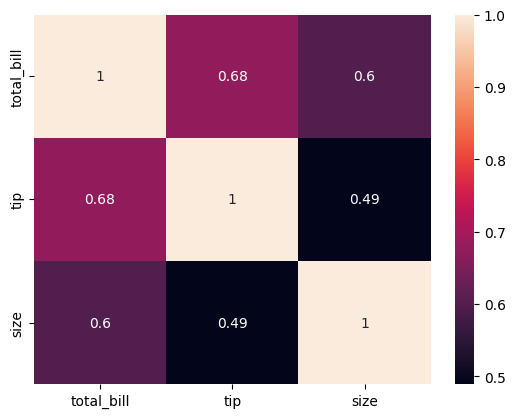

In [8]:
sns.heatmap(tips_corr.corr(),annot = True)

In [21]:
sns.clustermap(tips_corr.corr())

RuntimeError: clustermap requires scipy to be available

Pivote Table


In [23]:
pvtflight = flights.pivot_table(values='passengers',index = 'month', columns='year')
pvtflight

C:\Users\anura\AppData\Local\Temp\ipykernel_5408\2983808520.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvtflight = flights.pivot_table(values='passengers',index = 'month', columns='year')


year    1949   1950   1951   1952   1953   1954   1955   1956   1957   1958  \
month                                                                         
Jan    112.0  115.0  145.0  171.0  196.0  204.0  242.0  284.0  315.0  340.0   
Feb    118.0  126.0  150.0  180.0  196.0  188.0  233.0  277.0  301.0  318.0   
Mar    132.0  141.0  178.0  193.0  236.0  235.0  267.0  317.0  356.0  362.0   
Apr    129.0  135.0  163.0  181.0  235.0  227.0  269.0  313.0  348.0  348.0   
May    121.0  125.0  172.0  183.0  229.0  234.0  270.0  318.0  355.0  363.0   
Jun    135.0  149.0  178.0  218.0  243.0  264.0  315.0  374.0  422.0  435.0   
Jul    148.0  170.0  199.0  230.0  264.0  302.0  364.0  413.0  465.0  491.0   
Aug    148.0  170.0  199.0  242.0  272.0  293.0  347.0  405.0  467.0  505.0   
Sep    136.0  158.0  184.0  209.0  237.0  259.0  312.0  355.0  404.0  404.0   
Oct    119.0  133.0  162.0  191.0  211.0  229.0  274.0  306.0  347.0  359.0   
Nov    104.0  114.0  146.0  172.0  180.0  203.0  237.0  271.0  305.0  310.0   
Dec    118.0  140.0  166.0  194.0  201.0  229.0  278.0  306.0  336.0  337.0   

year    1959   1960  
month                
Jan    360.0  417.0  
Feb    342.0  391.0  
Mar    406.0  419.0  
Apr    396.0  461.0  
May    420.0  472.0  
Jun    472.0  535.0  
Jul    548.0  622.0  
Aug    559.0  606.0  
Sep    463.0  508.0  
Oct    407.0  461.0  
Nov    362.0  390.0  
Dec    405.0  432.0

<Axes: xlabel='year', ylabel='month'>

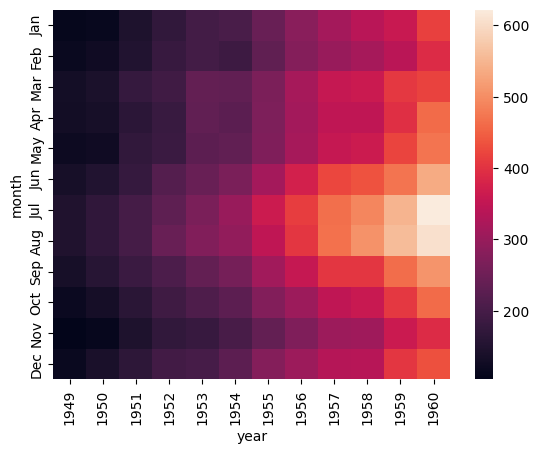

In [24]:
sns.heatmap(pvtflight)